<a href="https://colab.research.google.com/github/maulannafr/2025_imageProcessing/blob/main/Citra__Digital_Tersusun_dari_Beberapa_Piksel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Menampilkan bagaimana citra digital tersusun dari piksel dengan area fokus yang ditandai

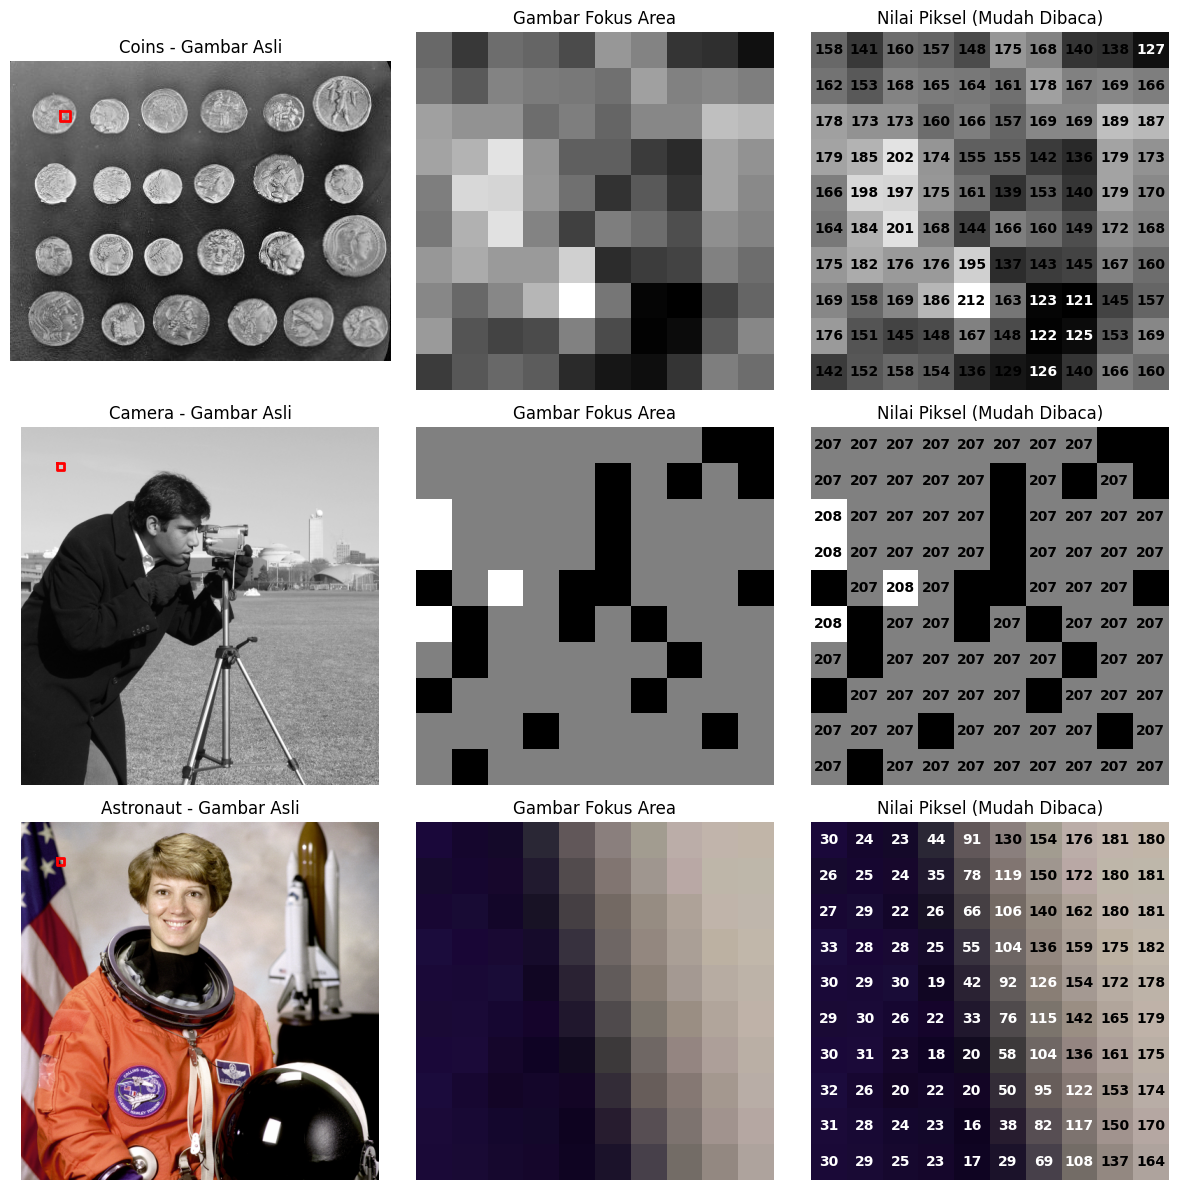

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Contoh gambar dari scikit-image
gambar_coins = data.coins()
gambar_camera = data.camera()
gambar_astronaut = data.astronaut()

# List gambar dan nama
gambar_list = [gambar_coins, gambar_camera, gambar_astronaut]
nama_list = ["Coins", "Camera", "Astronaut"]

# Koordinat area kecil yang di-zoom
x_start, x_end = 50, 60
y_start, y_end = 50, 60

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, (img, nama) in enumerate(zip(gambar_list, nama_list)):
    # Gambar asli
    axes[i, 0].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    axes[i, 0].set_title(f"{nama} - Gambar Asli")
    axes[i, 0].axis('off')

    # Tambahkan kotak merah untuk menunjukkan area yang difokuskan
    rect_x = [x_start, x_end, x_end, x_start, x_start]
    rect_y = [y_start, y_start, y_end, y_end, y_start]
    axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

    # Gambar fokus area
    zoomed_img = img[y_start:y_end, x_start:x_end]
    axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
    axes[i, 1].set_title("Gambar Fokus Area")
    axes[i, 1].axis('off')

    # Menampilkan nilai piksel dalam area yang di-zoom (khusus RGB, gunakan rata-rata kanal)
    axes[i, 2].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')

    for y in range(zoomed_img.shape[0]):
        for x in range(zoomed_img.shape[1]):
            if len(img.shape) == 3:  # Jika RGB, ambil nilai rata-rata piksel untuk tampilan angka
                pixel_value = np.mean(zoomed_img[y, x]).astype(int)
            else:
                pixel_value = zoomed_img[y, x]

            # Pilih warna teks agar mudah dibaca di latar belakang
            text_color = "white" if pixel_value < 128 else "black"
            axes[i, 2].text(x, y, str(pixel_value), color=text_color, ha='center', va='center',
                             fontsize=10, fontweight='bold')

    axes[i, 2].set_title("Nilai Piksel (Mudah Dibaca)")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
